In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["font.family"] = "Times New Roman"

df = pd.read_excel("Datasets/MetroManilaAccidents(AgeBracket).xlsx")
df.head()

,Fatal,Non_Fatal,Total,Year,Age_Bracket
0,14,522,536,2020,0-17
1,134,5599,5733,2020,18-34
2,89,3254,3343,2020,35-51
3,29,928,957,2020,52-65
4,16,251,267,2020,66 above


In [31]:
# from yellowbrick.cluster import KElbowVisualizer
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,12)).fit(df.iloc[:,0:1].values)
# visualizer.show()

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Fatal', 'Non_Fatal', 'Total']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

In [33]:
import matplotlib.pyplot as plt
plt.scatter(df.Fatal, df.Non_Fatal, c=df.c, alpha = 0.6, s=10)

In [34]:
plt.scatter(df.Fatal, df.Non_Fatal, c=df.c, s=df.Fatal, alpha = 0.6)

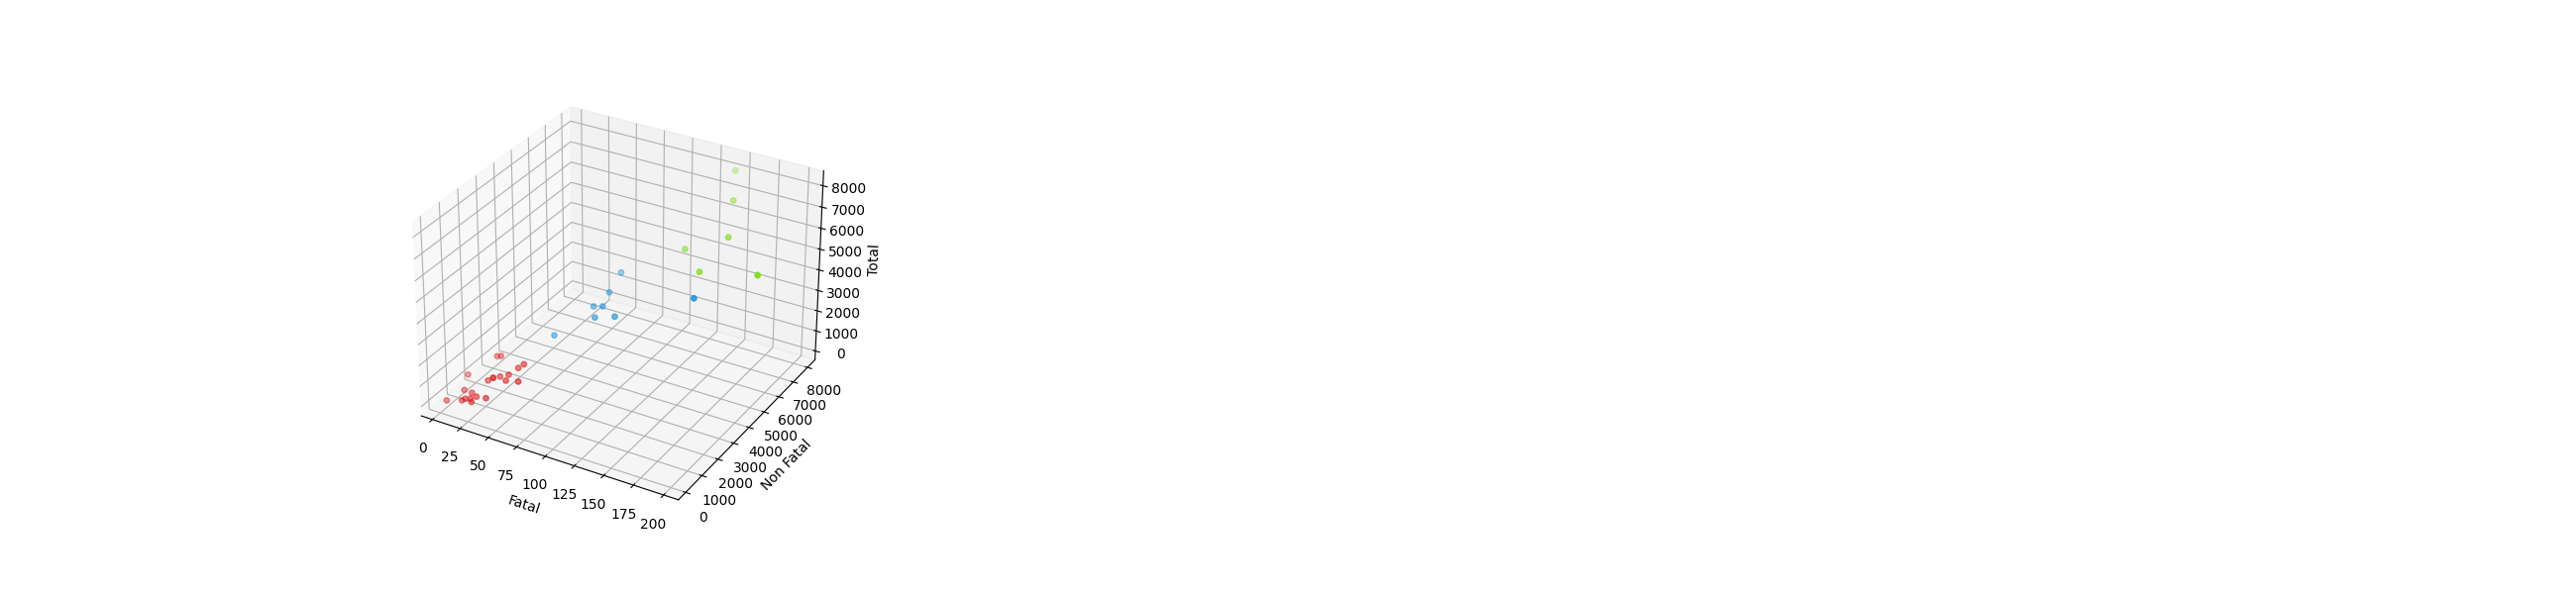

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull
import numpy as np
%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Fatal', 'Non_Fatal', 'Total']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Fatal, df.Non_Fatal, df.Total, c=df.c, s=15)
# # draw enclosure
# for i in df.cluster.unique():
#     points = df[df.cluster == i][['Fatal', 'Non_Fatal', 'Total']].values
#     # get convex hull
#     hull = ConvexHull(points)
#     # get x and y coordinates
#     # repeat last point to close the polygon
#     x_hull = np.append(points[hull.vertices,0],
#                        points[hull.vertices,0][0])
#     y_hull = np.append(points[hull.vertices,1],
#                        points[hull.vertices,1][0])
#     # plot shape
#     plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

ax.set_xlabel('Fatal')
ax.set_ylabel('Non Fatal')
ax.set_zlabel('Total')
plt.show()

Text(0, 0.5, 'Non Fatal')

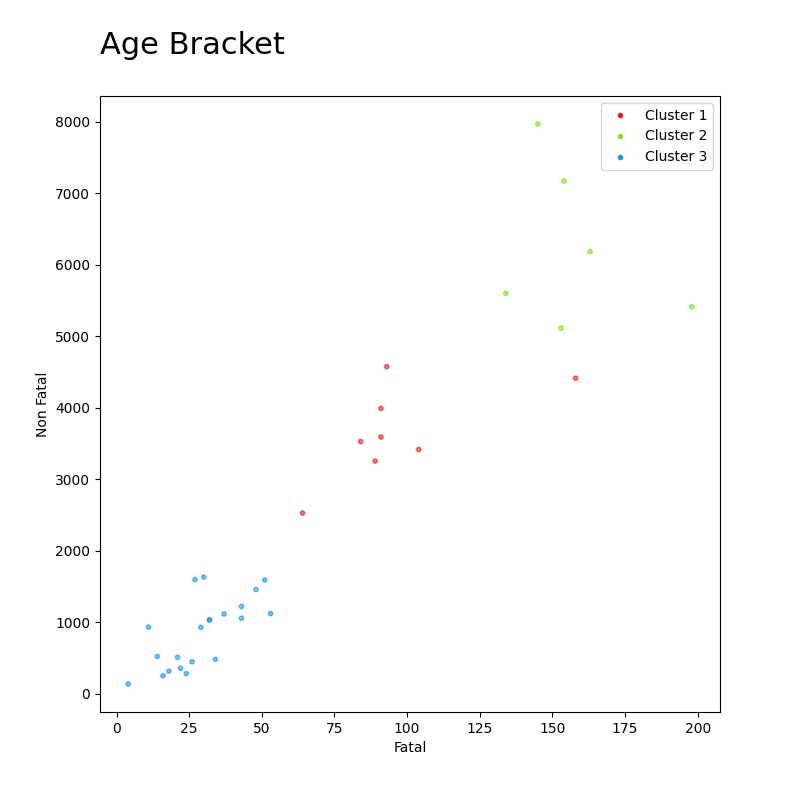

In [36]:
### BUILD A TWO DIMENSIONS CLUSTER AGAIN ###
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Fatal', 'Non_Fatal']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Fatal, df.Non_Fatal, c=df.c, alpha = 0.6, s=10)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('Age Bracket\n', loc='left', fontsize=22)
plt.xlabel('Fatal')
plt.ylabel('Non Fatal')

Text(0, 0.5, 'Non Fatal')

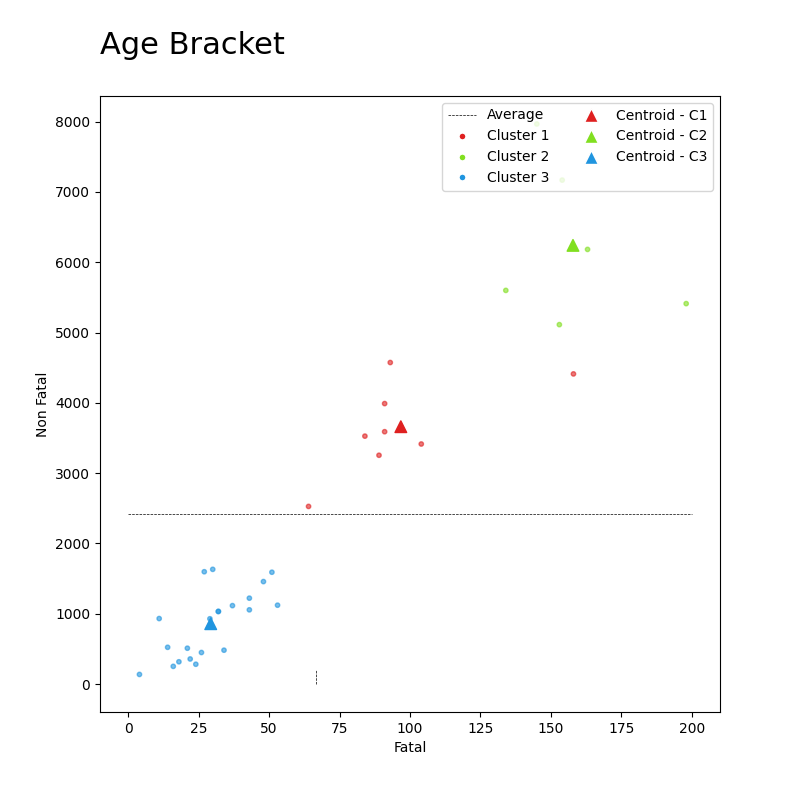

In [37]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Fatal, df.Non_Fatal, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot Fatal mean
plt.plot([df.Fatal.mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
# plt.xlim(0,200)
# plot Non Fatal mean
plt.plot([0,200], [df.Non_Fatal.mean()]*2, color='black', lw=0.5, linestyle='--')
# plt.ylim(0,200)
# create a list of legend elemntes
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title('Age Bracket\n', loc='left', fontsize=22)
plt.xlabel('Fatal')
plt.ylabel('Non Fatal')

Text(0, 0.5, 'Non Fatal')

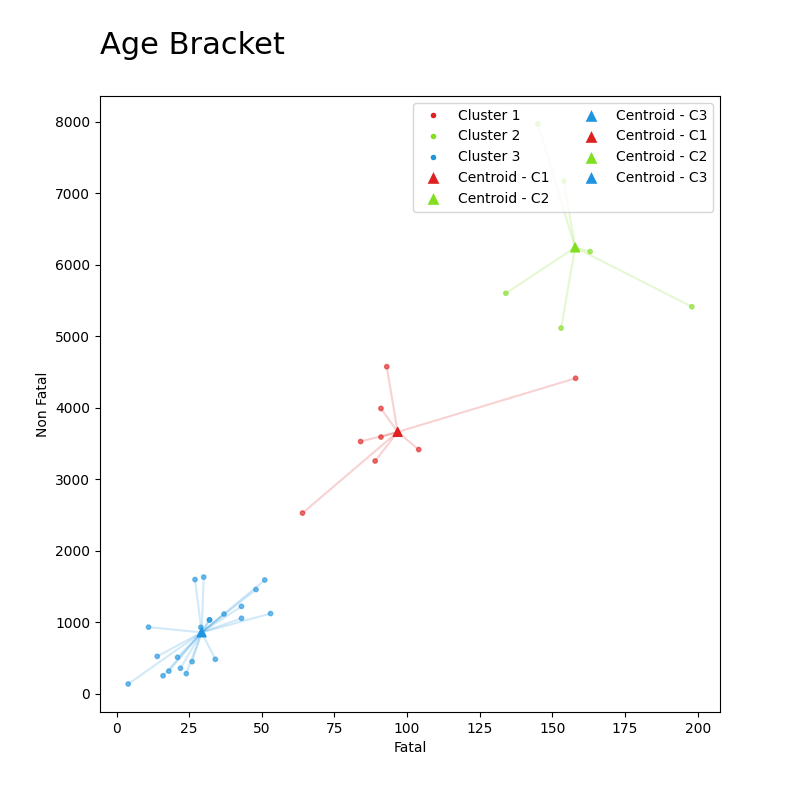

In [38]:
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Fatal, df.Non_Fatal, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=40)
# plot lines
for idx, val in df.iterrows():
    x = [val.Fatal, val.cen_x,]
    y = [val.Non_Fatal, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# x and y limits
# plt.xlim(0,200)
# plt.ylim(0,200)
# title and labels
plt.title('Age Bracket\n', loc='left', fontsize=22)
plt.xlabel('Fatal')
plt.ylabel('Non Fatal')

Text(0, 0.5, 'Non Fatal')

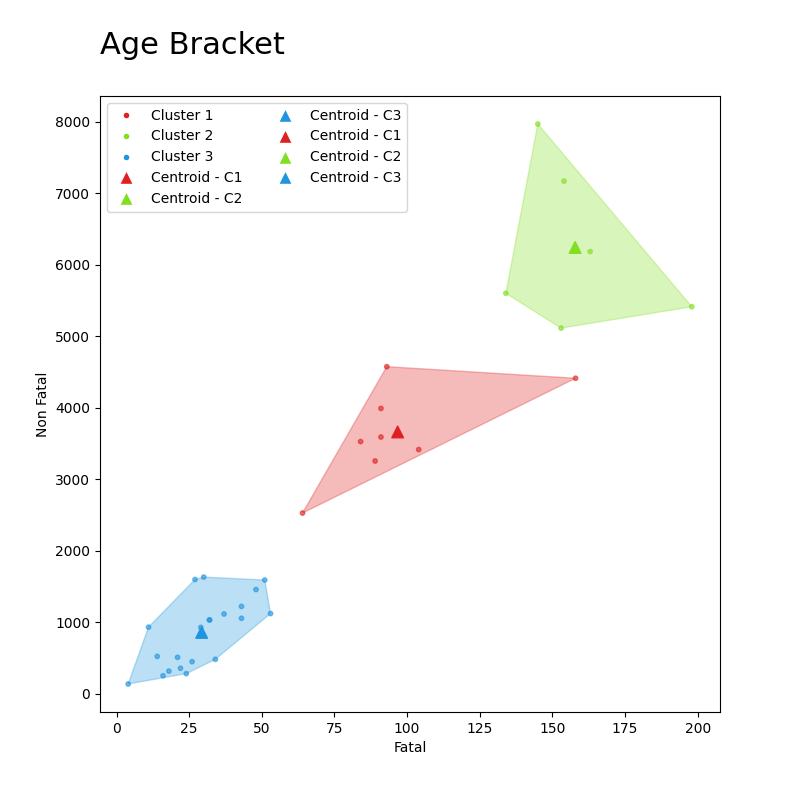

In [56]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Fatal, df.Non_Fatal, c=df.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Fatal', 'Non_Fatal']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

# # label each data points
# data=df.iloc[:,0:2].values
# for i in range(len(data)):
#     x = data[i][0]
#     y = data[i][1]
#     plt.text(x * (1 + 0.01), y * (1 + 0.01), df.Age_Bracket[i], fontsize=8)
    
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper left', ncol=2)

plt.title('Age Bracket\n', loc='left', fontsize=22)
plt.xlabel('Fatal')
plt.ylabel('Non Fatal')
    
# plt.xlim(0,10000)
# plt.ylim(0,10000)

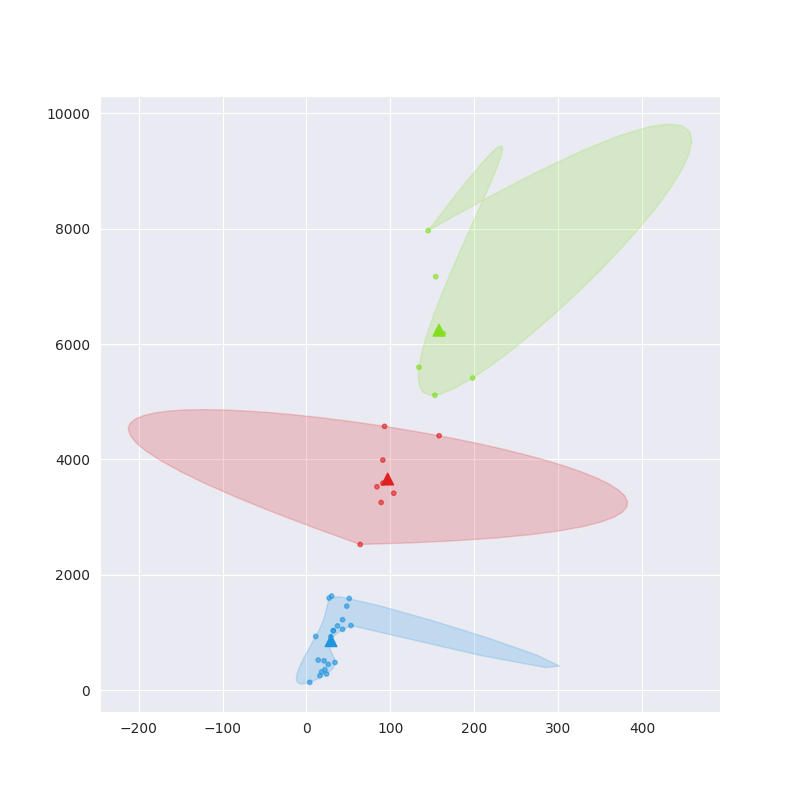

In [57]:
from scipy import interpolate
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df.Fatal, df.Non_Fatal, c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    
for i in df.cluster.unique():
    # get the convex hull
    points = df[df.cluster == i][['Fatal', 'Non_Fatal']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
    
# plt.xlim(0,200)
# plt.ylim(0,200)

In [58]:
# n_clusters=3

# km = KMeans(init='k-means++', n_clusters=n_clusters).fit(df[['Score']])

# counts = np.bincount(km.labels_)

# for center, count, label in zip(centroids, counts, range(3)):
#     print(center, count)
#     plt.bar(center, count, width=0.2, label=label)

#extract and include predicted cluster labels as column


#plot with seaborn
# clusters = kmeans.labels_
# plt.figure(figsize=(10,5))  #pic size
# sns.countplot(x=clusters , data=df.assign(hue=clusters), hue='hue')


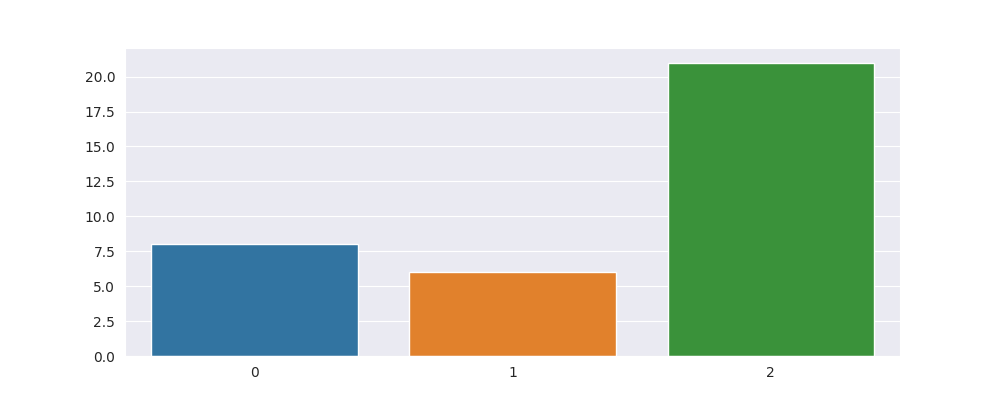

In [59]:
genders = df['cluster'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from itertools import permutations
from scipy.spatial import ConvexHull
from quadprog import solve_qp
from sklearn.metrics import accuracy_score

<ipython-input-61-c2493ebfb470>:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


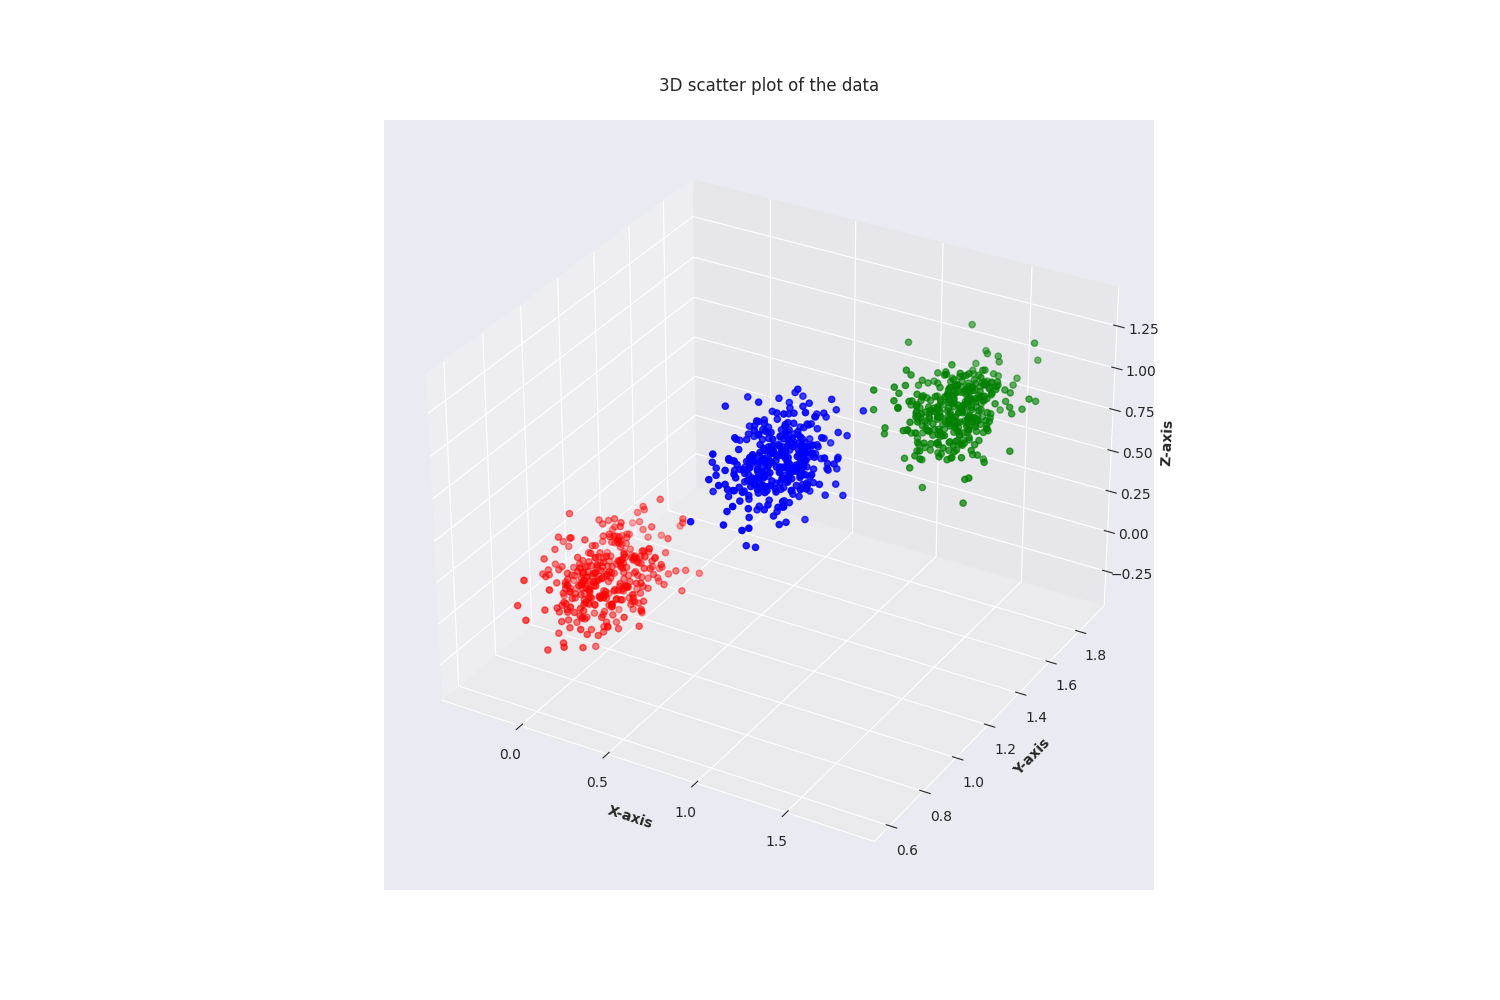

In [61]:
# Creating dataset 
centers = [[0, 1, 0], [1.5, 1.5, 1], [1, 1, 1]]
stds = [0.13, 0.12, 0.12]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)        
point_indices = np.arange(1000)

x = X[:,0]
y = X[:,1] 
z = X[:,2]
  
# Creating figure 
fig = plt.figure(figsize = (15, 10)) 
ax = plt.axes(projection ="3d") 
    
# Add gridlines  
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.3,  
        alpha = 0.2)  
  
mycolours = ["red", "green", "blue"]

# Creating color map 
col = [mycolours[i] for i in labels_true]

# Creating plot 
sctt = ax.scatter3D(x, y, z, c = col, marker ='o') 

plt.title("3D scatter plot of the data\n") 
ax.set_xlabel('X-axis', fontweight ='bold')  
ax.set_ylabel('Y-axis', fontweight ='bold')  
ax.set_zlabel('Z-axis', fontweight ='bold')
  
# show plot 
plt.draw()
# plt.savefig('dataset.png', dpi=300, bbox_inches="tight")

In [62]:
def remap_labels(pred_labels, true_labels):
    """Rename prediction labels (clustered output) to best match true labels."""
    # from itertools import permutations # import this into script.
    pred_labels, true_labels = np.array(pred_labels), np.array(true_labels)
    assert pred_labels.ndim == 1 == true_labels.ndim
    assert len(pred_labels) == len(true_labels)
    cluster_names = np.unique(pred_labels)
    accuracy = 0

    perms = np.array(list(permutations(np.unique(true_labels))))

    remapped_labels = true_labels
    for perm in perms:
        flipped_labels = np.zeros(len(true_labels))
        for label_index, label in enumerate(cluster_names):
            flipped_labels[pred_labels == label] = perm[label_index]

        testAcc = np.sum(flipped_labels == true_labels) / len(true_labels)
        if testAcc > accuracy:
            accuracy = testAcc
            remapped_labels = flipped_labels

    return accuracy, remapped_labels

In [63]:
kmeans = KMeans(n_clusters=3, random_state=9).fit(X_seeds)
initial_result = kmeans.labels_

intial_accuracy, remapped_initial_result = remap_labels(initial_result, y_seeds)
print(intial_accuracy)

NameError: name 'X_seeds' is not defined

In [67]:
import plotly.graph_objects as go
import itertools, math, numpy as np

from scipy.spatial import ConvexHull

# This simply creates a set of points:
n = 3
m = 3
E = np.array(list(itertools.product(np.arange(-1, 1.1, .5), repeat=m)))
V = [
 [-2.20676418,  1.53670924, -1.5541674 ],
 [ 0.63437404,  0.07306301,  3.82253086],
 [ 3.19989112,  0.71987311,  2.79373418]
]
x = np.array([np.dot(V, e) for e in E])

# Then I compute the convex hull using scipy:
xc = x[ConvexHull(x).vertices]

fig = go.Figure()
fig.add_trace(go.Mesh3d(x=xc[:, 0], 
                        y=xc[:, 1], 
                        z=xc[:, 2], 
                        color="blue", 
                        opacity=.5,
                        alphahull=0))